1.Innledning  
Lønnsutvikling er et samfunnsmessig viktig tema fordi det handler om befolkningens velferd. Det 
kommer spesielt til syne i forbindelse med lønnsoppgjør, men er også et stadig tilbakevendende tema i 
samfunnsdebatten. Hvordan er inntektsfordelingen mellom ulike yrkesgrupper og hvordan har 
lønnsutviklingen vært over år? I denne sammenheng er reallønnsutvikling spesielt viktig fordi den forteller
hvordan lønna har utviklet seg i forhold til prisstigningen.


2.Litteraturgjennomgang


3.Teori


4.Analyse

In [170]:
import pandas as pd
import numpy as np
import statistics
from matplotlib import pyplot as plt

In [171]:
df = pd.read_csv("https://data.ssb.no/api/v0/dataset/1086.csv?l", sep = ";", decimal=",", encoding = "ISO-8859-1")
print(df)

           konsumgruppe    måned             statistikkvariabel  \
0     TOTAL Totalindeks  1979M01    Konsumprisindeks (2015=100)   
1     TOTAL Totalindeks  1979M01        Månedsendring (prosent)   
2     TOTAL Totalindeks  1979M01  12-måneders endring (prosent)   
3     TOTAL Totalindeks  1979M02    Konsumprisindeks (2015=100)   
4     TOTAL Totalindeks  1979M02        Månedsendring (prosent)   
...                 ...      ...                            ...   
1537  TOTAL Totalindeks  2021M09        Månedsendring (prosent)   
1538  TOTAL Totalindeks  2021M09  12-måneders endring (prosent)   
1539  TOTAL Totalindeks  2021M10    Konsumprisindeks (2015=100)   
1540  TOTAL Totalindeks  2021M10        Månedsendring (prosent)   
1541  TOTAL Totalindeks  2021M10  12-måneders endring (prosent)   

      03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel  
0                                                  25.3                         
1                                

We collect the variable "Konsumprisindeks (2015=100)"

In [172]:
kpi = df[df['statistikkvariabel'] == 'Konsumprisindeks (2015=100)']
kpi.head()

,konsumgruppe,måned,statistikkvariabel,"03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel"
0,TOTAL Totalindeks,1979M01,Konsumprisindeks (2015=100),25.3
3,TOTAL Totalindeks,1979M02,Konsumprisindeks (2015=100),25.4
6,TOTAL Totalindeks,1979M03,Konsumprisindeks (2015=100),25.5
9,TOTAL Totalindeks,1979M04,Konsumprisindeks (2015=100),25.6
12,TOTAL Totalindeks,1979M05,Konsumprisindeks (2015=100),25.7


In [173]:
kpi = kpi[['måned', '03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel']]
kpi.head()

,måned,"03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel"
0,1979M01,25.3
3,1979M02,25.4
6,1979M03,25.5
9,1979M04,25.6
12,1979M05,25.7


In [174]:
kpi.rename(columns={'03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel': 'KPI'}, inplace=True)
kpi.head()

,måned,KPI
0,1979M01,25.3
3,1979M02,25.4
6,1979M03,25.5
9,1979M04,25.6
12,1979M05,25.7


In [175]:
kpi.reset_index()

,index,måned,KPI
0,0,1979M01,25.3
1,3,1979M02,25.4
2,6,1979M03,25.5
3,9,1979M04,25.6
4,12,1979M05,25.7
...,...,...,...
509,1527,2021M06,115.3
510,1530,2021M07,116.3
511,1533,2021M08,116.3
512,1536,2021M09,117.5


In [176]:
type('måned)')
type('KPI')

str

We calculate the mean of each year and put it in a new table "KPI".

In [177]:
kpi_2015 = kpi.loc[(kpi['måned'] >= '2015M01') & (kpi['måned'] <= '2015M12')]
kpi_2015_mean=statistics.mean(kpi_2015['KPI'])

In [178]:
kpi_2016 = kpi.loc[(kpi['måned'] >= '2016M01') & (kpi['måned'] <= '2016M12')]
kpi_2016_mean=statistics.mean(kpi_2016['KPI'])
#round(kpi_2016_mean, 1)

In [179]:
kpi_2017 = kpi.loc[(kpi['måned'] >= '2017M01') & (kpi['måned'] <= '2017M12')]
kpi_2017_mean=statistics.mean(kpi_2017['KPI'])

In [180]:
kpi_2018 = kpi.loc[(kpi['måned'] >= '2018M01') & (kpi['måned'] <= '2018M12')]
kpi_2018_mean=statistics.mean(kpi_2018['KPI'])

In [181]:
kpi_2019 = kpi.loc[(kpi['måned'] >= '2019M01') & (kpi['måned'] <= '2019M12')]
kpi_2019_mean=statistics.mean(kpi_2019['KPI'])

In [182]:
kpi_2020 = kpi.loc[(kpi['måned'] >= '2020M01') & (kpi['måned'] <= '2020M12')]
kpi_2020_mean=statistics.mean(kpi_2020['KPI'])                                                       

In [183]:
# list of strings
year = [2015, 2016, 2017, 2018, 2019, 2020]
  
# list of years
kpi_mean = [kpi_2015_mean, kpi_2016_mean, kpi_2017_mean, kpi_2018_mean, kpi_2019_mean, kpi_2020_mean ]
  
# both lists, with columns specified
KPI = pd.DataFrame(list(zip(year, kpi_mean)),
               columns =['year', 'KPI'])
KPI = round(KPI, 1)
KPI

,year,KPI
0,2015,100.0
1,2016,103.6
2,2017,105.5
3,2018,108.4
4,2019,110.8
5,2020,112.2


We make a plot of development for the konsumprisindeks "KPI".

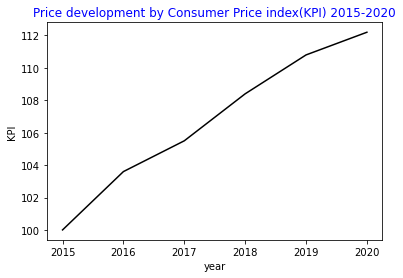

In [187]:
#lage plottet litt større
plt.plot(KPI['year'], KPI['KPI'], color="black" )
plt.xlabel('year')
plt.ylabel('KPI')
plt.title("Price development by Consumer Price index(KPI) 2015-2020", color="blue")
plt.show()


Comment:  
The index is set at 2015 = 100. We see that prices have increased by 12.2 percent from 2015 to 2020.

We import necessary packages and data of yearwages from Statistisk Sentralbyrå(SSB)

In [188]:
from pyjstat import pyjstat
import requests

In [189]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/11417/'

In [190]:
payload = {
  "query": [
    {
      "code": "NACE2007",
      "selection": {
        "filter": "item",
        "values": [
          "A-S",
          "A",
          "B",
          "C",
          "D",
          "E",
          "F",
          "G",
          "H",
          "I",
          "J",
          "K",
          "L",
          "M",
          "N",
          "O",
          "P",
          "Q",
          "R",
          "S",
          "T",
          "U",
          "00"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Arslonn"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [191]:
yearwage = requests.post(POST_URL, json = payload)

In [192]:
print(yearwage)

<Response [200]>


In [193]:
yearwage = pyjstat.Dataset.read(yearwage.text)

In [194]:
year_wage = yearwage.write('dataframe') 

In [195]:
print(year_wage)

    næring (SN2007) statistikkvariabel    år     value
0     Alle næringer       Årslønn (kr)  2015  516000.0
1     Alle næringer       Årslønn (kr)  2016  522700.0
2     Alle næringer       Årslønn (kr)  2017  535400.0
3     Alle næringer       Årslønn (kr)  2018  550800.0
4     Alle næringer       Årslønn (kr)  2019  569900.0
..              ...                ...   ...       ...
133        Uoppgitt       Årslønn (kr)  2016  599300.0
134        Uoppgitt       Årslønn (kr)  2017  611400.0
135        Uoppgitt       Årslønn (kr)  2018  648400.0
136        Uoppgitt       Årslønn (kr)  2019  741500.0
137        Uoppgitt       Årslønn (kr)  2020  739500.0

[138 rows x 4 columns]


Source: Statistisk Sentralbyrå(SSB). Data can also be collected directly from table 11417: Årslønn, etter næring (19 grupper) 2015 - 2020.  
https://www.ssb.no/statbank/table/11417/  
Comment:  
SSB comments that the yearwages of 2015 and 2016 are not comparable. I include these anyway because it has no significance for the analysis for the entire time period 2015-2020.

We rename 'år' to 'year' and value' to 'yearwage', and remove the column "statistikkvariabel"

In [196]:
year_wage.rename(columns={'value': 'yearwage', 'år': 'year'}, inplace=True)

In [197]:
year_wage = year_wage[['næring (SN2007)', 'year', 'yearwage']]
year_wage.head()

,næring (SN2007),year,yearwage
0,Alle næringer,2015,516000.0
1,Alle næringer,2016,522700.0
2,Alle næringer,2017,535400.0
3,Alle næringer,2018,550800.0
4,Alle næringer,2019,569900.0


We now make a pivot table with year numbers in the first column and then the industries

In [198]:
year_wage_industries = pd.pivot_table(year_wage, index = 'year', columns = 'næring (SN2007)', values = 'yearwage')
year_wage_industries

næring (SN2007),Alle næringer,Annen tjenesteyting,Bergverksdrift og utvinning,Bygge- og anleggsvirksomhet,"Elektrisitets-, gass-, damp- og varmtvannsforsyning","Faglig, vitenskapelig og teknisk tjenesteyting",Finansierings- og forsikringsvirksomhet,Forretningsmessig tjenesteyting,Helse- og sosialtjenester,Industri,...,"Kultur, underholdning og fritid",Lønnet arbeid i private husholdninger,"Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning",Omsetning og drift av fast eiendom,Overnattings- og serveringsvirksomhet,Transport og lagring,Undervisning,Uoppgitt,"Vann, avløp, renovasjon","Varehandel, reparasjon av motorvogner"
year,,,,,,,,,,,,,,,,,,,,,
2015,516000.0,473200.0,836300.0,484200.0,659800.0,646500.0,746400.0,439700.0,468100.0,530200.0,...,447900.0,NaN,545000.0,622000.0,350200.0,521300.0,501300.0,NaN,476800.0,456300.0
2016,522700.0,481300.0,834000.0,498700.0,659000.0,652600.0,745700.0,443800.0,479000.0,534100.0,...,446000.0,435900.0,556400.0,633600.0,354200.0,524800.0,516100.0,599300.0,483200.0,465800.0
2017,535400.0,495200.0,841800.0,509600.0,690000.0,664800.0,770800.0,453600.0,495500.0,546400.0,...,459300.0,442400.0,576600.0,643700.0,360300.0,533100.0,523500.0,611400.0,500100.0,480900.0
2018,550800.0,506800.0,873900.0,524400.0,716000.0,683200.0,798400.0,466100.0,510000.0,560600.0,...,473500.0,452300.0,594900.0,660400.0,373500.0,545500.0,536800.0,648400.0,513600.0,494900.0
2019,569900.0,523600.0,896000.0,539800.0,743800.0,706100.0,816600.0,483200.0,528700.0,578600.0,...,488500.0,463900.0,616700.0,676600.0,388900.0,562700.0,552900.0,741500.0,527400.0,512800.0
2020,587600.0,544600.0,896700.0,555900.0,770300.0,725700.0,845300.0,495900.0,540900.0,591900.0,...,504400.0,478900.0,629100.0,712600.0,398700.0,574400.0,564200.0,739500.0,541100.0,532400.0


Let us first look at the development of the yearwage in the different industries in the periode 2015-2020. We remove the sum column "Alle næringer" and industries with NA. 

In [199]:
year_wage_year = pd.pivot_table(year_wage, index = 'næring (SN2007)', columns = 'year', values = 'yearwage')

In [200]:
year_wage_year_industries = year_wage_year.drop(['Alle næringer','Internasjonale organisasjoner og organer','Lønnet arbeid i private husholdninger','Uoppgitt'])
year_wage_year_industries

year,2015,2016,2017,2018,2019,2020
næring (SN2007),,,,,,
Annen tjenesteyting,473200.0,481300.0,495200.0,506800.0,523600.0,544600.0
Bergverksdrift og utvinning,836300.0,834000.0,841800.0,873900.0,896000.0,896700.0
Bygge- og anleggsvirksomhet,484200.0,498700.0,509600.0,524400.0,539800.0,555900.0
"Elektrisitets-, gass-, damp- og varmtvannsforsyning",659800.0,659000.0,690000.0,716000.0,743800.0,770300.0
"Faglig, vitenskapelig og teknisk tjenesteyting",646500.0,652600.0,664800.0,683200.0,706100.0,725700.0
Finansierings- og forsikringsvirksomhet,746400.0,745700.0,770800.0,798400.0,816600.0,845300.0
Forretningsmessig tjenesteyting,439700.0,443800.0,453600.0,466100.0,483200.0,495900.0
Helse- og sosialtjenester,468100.0,479000.0,495500.0,510000.0,528700.0,540900.0
Industri,530200.0,534100.0,546400.0,560600.0,578600.0,591900.0


We obtain data that describe general wage differences.

In [201]:
year_wage_year_industries = round(year_wage_year_industries.describe(),0)
year_wage_year_industries

year,2015,2016,2017,2018,2019,2020
count,19.0,19.0,19.0,19.0,19.0,19.0
mean,541337.0,548021.0,562521.0,579505.0,598100.0,615247.0
std,123538.0,121682.0,123797.0,129035.0,131279.0,132829.0
min,350200.0,354200.0,360300.0,373500.0,388900.0,398700.0
25%,462200.0,472400.0,488050.0,500850.0,518200.0,536650.0
50%,501300.0,516100.0,523500.0,536800.0,552900.0,564200.0
75%,634250.0,643100.0,654250.0,671800.0,691350.0,719150.0
max,836300.0,834000.0,841800.0,873900.0,896000.0,896700.0


Comment:  
The average annual salary has increased from NOK 541 336 in 2015 to NOK 615 247 in 2020 for all industries in the sample.
The lowest annual salary has been increased from NOK 350 200 in 2015 to NOK 398 700 in 2020. We find this in Overnatting- og serveringsvirksomhet.
The highest annual salary in 2015 was NOK 836 300, this was increased to NOK 896 700 in 2020. We find these figures in Bergverksdrift og utvinning.
The median annual salary has been increased from NOK 501 300 in 2015 to NOK 564 200 in 2020. We find this by sorting all salaries in ascending order. The median salary measures that in 2020, 50 per cent of wage earners earned less than NOK 564 200.

We select all industries as well as the seven largest according to the proportion of employees. These industries represent about 70 percent of the employed.
- Alle næringer
- Bygge- og anleggsvirksomhet 8.6 %
- Forretningsmessig tjenesteyting 4.7 %
- Helse- og sosialtjenester 21 %
- Industri 7.7 %
- Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning 6.4 %
- Undervisning 8.4 %
- Varehandel, reparasjon av motorvogner 12.8 %

Source: Statistisk Sentralbyrå: Tabell 07984: Alder- og næringsfordeling (17 grupper) blant sysselsatte, etter kjønn. 4. kvartal (K) 2008 - 2020  
https://www.ssb.no/statbank/table/07984/


In [202]:
# We reset the index and choose the variables
year_wage_industries = year_wage_industries.reset_index()

In [203]:
#Årslønn_etter_næring = Årslønn_etter_næring.set_index('år')
#print(Årslønn_etter_næring)

In [204]:
industries_wages = year_wage_industries[['year','Alle næringer', 'Bygge- og anleggsvirksomhet', 'Forretningsmessig tjenesteyting', 'Helse- og sosialtjenester',
                                     'Industri', 'Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning', 'Undervisning',
                                     'Varehandel, reparasjon av motorvogner']]
industries_wages

næring (SN2007),year,Alle næringer,Bygge- og anleggsvirksomhet,Forretningsmessig tjenesteyting,Helse- og sosialtjenester,Industri,"Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning",Undervisning,"Varehandel, reparasjon av motorvogner"
0,2015,516000.0,484200.0,439700.0,468100.0,530200.0,545000.0,501300.0,456300.0
1,2016,522700.0,498700.0,443800.0,479000.0,534100.0,556400.0,516100.0,465800.0
2,2017,535400.0,509600.0,453600.0,495500.0,546400.0,576600.0,523500.0,480900.0
3,2018,550800.0,524400.0,466100.0,510000.0,560600.0,594900.0,536800.0,494900.0
4,2019,569900.0,539800.0,483200.0,528700.0,578600.0,616700.0,552900.0,512800.0
5,2020,587600.0,555900.0,495900.0,540900.0,591900.0,629100.0,564200.0,532400.0


Kommentar:  
I utvalget av næringer finner vi høyeste årslønn innen Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning med kr 629 100 og 
laveste årslønn innen Forretningsmessig tjenesteyting med kr 495 900.


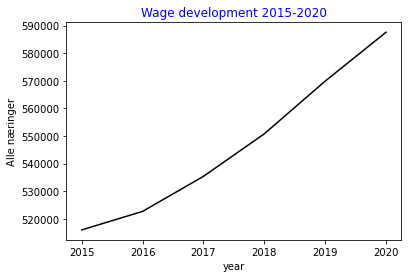

In [205]:

plt.plot(year_wage_industries['year'], year_wage_industries['Alle næringer'], color="black")
plt.xlabel('year')
plt.ylabel('Alle næringer')
plt.title("Wage development 2015-2020", color="blue")
plt.show()

The figure shows that the total nominal year_wage has increased from NOK 516 000 in 2015 to 587 600 in 2020. This represents an increase of 13.9 per cent.


In [206]:
print((587600/516000-1)*100)

13.875968992248055


For the "KPI"-variable, the base year was set at 2015 = 100. To make the wage development comparable to the "KPI", we do the same with the wage variable "industries_wages_index"

In [207]:
# We make a new df for the index
industries_wages_for_index = industries_wages.set_index('year')


In [208]:
industries_wages_index=100*industries_wages_for_index.div(industries_wages_for_index.iloc[0])
round(industries_wages_index,1)

næring (SN2007),Alle næringer,Bygge- og anleggsvirksomhet,Forretningsmessig tjenesteyting,Helse- og sosialtjenester,Industri,"Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning",Undervisning,"Varehandel, reparasjon av motorvogner"
year,,,,,,,,
2015,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2016,101.3,103.0,100.9,102.3,100.7,102.1,103.0,102.1
2017,103.8,105.2,103.2,105.9,103.1,105.8,104.4,105.4
2018,106.7,108.3,106.0,109.0,105.7,109.2,107.1,108.5
2019,110.4,111.5,109.9,112.9,109.1,113.2,110.3,112.4
2020,113.9,114.8,112.8,115.6,111.6,115.4,112.5,116.7


Comment:  
We see that for all industries in total, the annual salary has increased nominally by 13.9 per cent in the period 2015-2020.
There are differences between the industries in our sample. The strongest growth in annual wages is found in Varehandel, reparasjon av motorvogner by 16.7 per cent,
Helse- og sosialtjenester with 15.6 per cent and Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning with 15.4 per cent.
industrien has experienced the lowest annual wage growth with an 11.6 per cent nominal increase, and Undervisning with 12.5 per cent.
From the previous table, we remember that the lowest annual salary in 2020 was in Forretningsmessig tjenesteyting. Here, there has been a nominal annual wage growth for the entire period of 12.8 per cent.


In [209]:
# We want to reset index because we want "year" to be index
industries_wages_index = industries_wages_index.reset_index()

In [210]:
# We also want to change "year" to datatype "int"
industries_wages_index['year'] = industries_wages_index['year'].astype(int)

Real wage development  
We have now assessed the development of the Consumer Price Index "KPI", and we have looked at nominal annual wage growth. What does the picture look like if we
relate these and look at real wage development? Has there been a general decline in real wages / increase? Are there any of the industries in the sample that have performed better than others?
These questions will be addressed in the following.

First we merge the "KPI" table and the "industries_wages_index" table

In [211]:
KPI_wages = KPI.merge(industries_wages_index, on='year', how='left')
round(KPI_wages,1) 

,year,KPI,Alle næringer,Bygge- og anleggsvirksomhet,Forretningsmessig tjenesteyting,Helse- og sosialtjenester,Industri,"Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning",Undervisning,"Varehandel, reparasjon av motorvogner"
0,2015,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2016,103.6,101.3,103.0,100.9,102.3,100.7,102.1,103.0,102.1
2,2017,105.5,103.8,105.2,103.2,105.9,103.1,105.8,104.4,105.4
3,2018,108.4,106.7,108.3,106.0,109.0,105.7,109.2,107.1,108.5
4,2019,110.8,110.4,111.5,109.9,112.9,109.1,113.2,110.3,112.4
5,2020,112.2,113.9,114.8,112.8,115.6,111.6,115.4,112.5,116.7


Comment:  
The table above shows that the nominal annual wage growth for all industries as a whole has been 13.9 per cent in the period 2015-2020. At the same time, inflation measured by the consumer price index "KPI" was 12.2 per cent. This implies a general real wage growth of 1.7 percentage points or 1.5 per cent.
Variations between years
More about the industries

<function matplotlib.pyplot.show(close=None, block=None)>

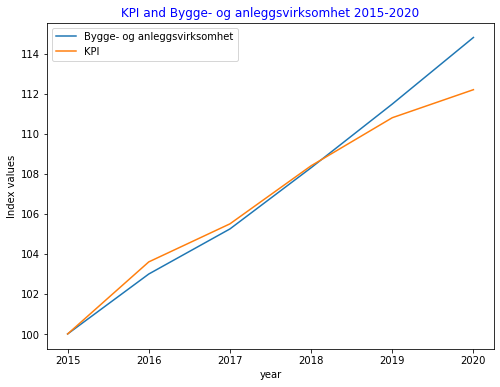

In [216]:
# General development
x = KPI_wages['year']
y = KPI_wages[['Bygge- og anleggsvirksomhet','KPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("KPI and Bygge- og anleggsvirksomhet 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Bygge- og anleggsvirksomhet', 'KPI'])
plt.show

Comment:

<function matplotlib.pyplot.show(close=None, block=None)>

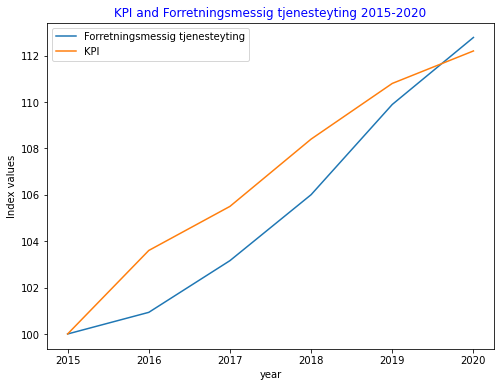

In [219]:
# Development inside Forretningsmessig tjenesteyting
x = KPI_wages['year']
y = KPI_wages[['Forretningsmessig tjenesteyting','KPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("KPI and Forretningsmessig tjenesteyting 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Forretningsmessig tjenesteyting', 'KPI'])
plt.show

Comment

<function matplotlib.pyplot.show(close=None, block=None)>

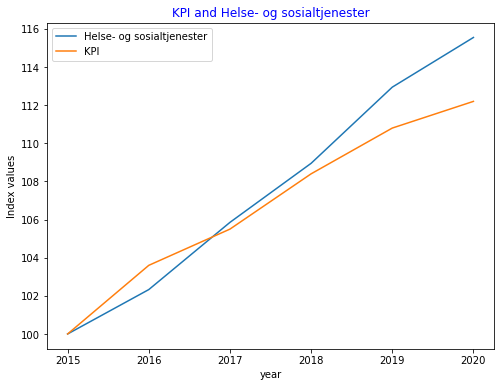

In [220]:
# Development inside Helse- og sosialtjenester
x = KPI_wages['year']
y = KPI_wages[['Helse- og sosialtjenester','KPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("KPI and Helse- og sosialtjenester", color="blue")
ax.plot(x,y)
ax.legend(['Helse- og sosialtjenester', 'KPI'])
plt.show

Comment:

<function matplotlib.pyplot.show(close=None, block=None)>

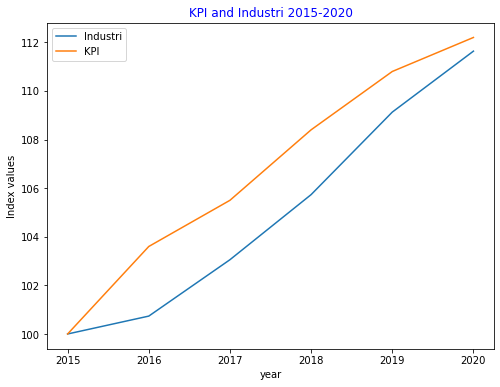

In [221]:
# Development inside Industri
x = KPI_wages['year']
y = KPI_wages[['Industri','KPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("KPI and Industri 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Industri', 'KPI'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

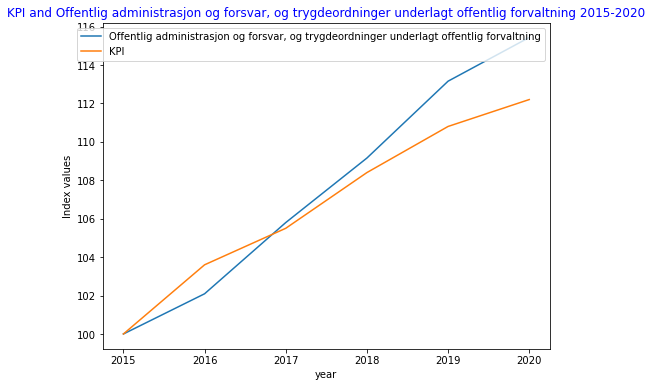

In [225]:
# Development inside Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning
x = KPI_wages['year']
y = KPI_wages[['Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning','KPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("KPI and Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning', 'KPI'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

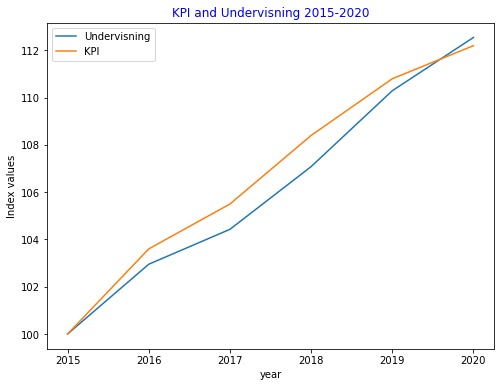

In [226]:
# Development inside Undervisning
x = KPI_wages['year']
y = KPI_wages[['Undervisning','KPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("KPI and Undervisning 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Undervisning', 'KPI'])
plt.show

Comment:

<function matplotlib.pyplot.show(close=None, block=None)>

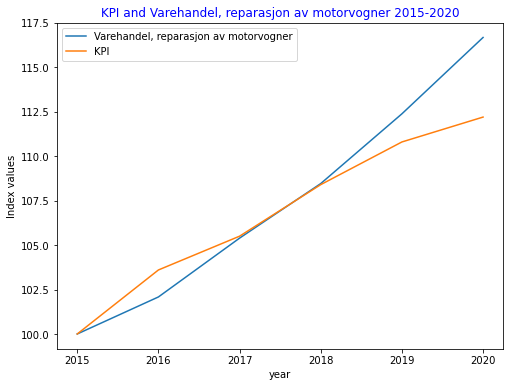

In [227]:
# Development inside Varehandel, reparasjon av motorvogner
x = KPI_wages['year']
y = KPI_wages[['Varehandel, reparasjon av motorvogner','KPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("KPI and Varehandel, reparasjon av motorvogner 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Varehandel, reparasjon av motorvogner', 'KPI'])
plt.show

Conclusion: